In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [30]:
data = pd.read_csv('NIFTY 50-28-12-2023-to-28-12-2024.csv')  # Your stock data


In [32]:
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,28-DEC-2023,21715.00,21801.45,21678.00,21778.70,393080755.0,35031.00
1,29-DEC-2023,21737.65,21770.30,21676.90,21731.40,270922276.0,23697.88
2,01-JAN-2024,21727.75,21834.35,21680.85,21741.90,153995217.0,14184.09
3,02-JAN-2024,21751.35,21755.60,21555.65,21665.80,263711568.0,25316.13
4,03-JAN-2024,21661.10,21677.00,21500.35,21517.35,311933117.0,32329.23


In [86]:
data.columns = data.columns.str.strip()
data['Close'] = data['Close'].values.reshape(-1, 1)


In [88]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)


In [84]:
data

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,21715.00,21801.45,21678.00,21778.70,393080755.0,35031.00
1,21737.65,21770.30,21676.90,21731.40,270922276.0,23697.88
2,21727.75,21834.35,21680.85,21741.90,153995217.0,14184.09
3,21751.35,21755.60,21555.65,21665.80,263711568.0,25316.13
4,21661.10,21677.00,21500.35,21517.35,311933117.0,32329.23
...,...,...,...,...,...,...
244,23960.70,24065.80,23537.35,23587.50,442714411.0,47084.68
245,23738.20,23869.55,23647.20,23753.45,189758237.0,18243.28
246,23769.10,23867.65,23685.15,23727.65,177664746.0,16010.71
247,23775.80,23854.50,23653.60,23750.20,177681783.0,16695.10


In [60]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [68]:
# Prepare data for LSTM
def prepare_data(data, time_step=60):
    x, y = [], []
    for i in range(len(data) - time_step - 1):
        x.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(x), np.array(y)

x, y = prepare_data(data_scaled)

In [80]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.strip()


In [95]:
# Reshape for LSTM [samples, time_step, features]
x = x.reshape(x.shape[0], x.shape[1], 1)


In [97]:
# Split into training and test sets
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [99]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\om\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [107]:
# Train Model
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0064
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0059
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0053
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0058
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0052
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0049
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0055
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0053
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0056
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0055


In [109]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data[['Close']])  # Fit the scaler only on the 'Close' column, assuming that's the relevant feature
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [111]:
# Predictions
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


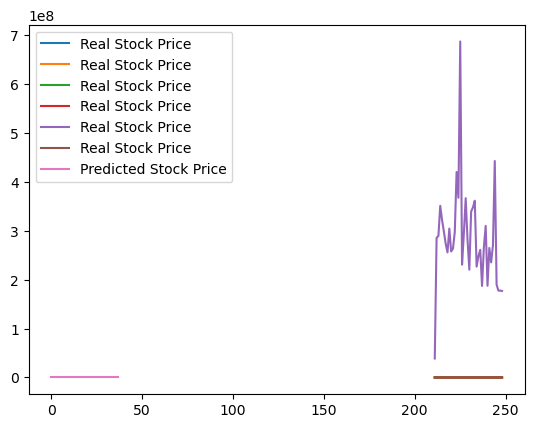

In [115]:
# Visualize the Results
plt.plot(data[-len(y_test):], label='Real Stock Price')
plt.plot(predicted_stock_price, label='Predicted Stock Price')
plt.legend()
plt.show()

In [123]:

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Display the updated dataframe
print(df.head())


Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64
         Date      Open      High       Low     Close   Shares Traded   \
0  28-DEC-2023  21715.00  21801.45  21678.00  21778.70     393080755.0   
1  29-DEC-2023  21737.65  21770.30  21676.90  21731.40     270922276.0   
2  01-JAN-2024  21727.75  21834.35  21680.85  21741.90     153995217.0   
3  02-JAN-2024  21751.35  21755.60  21555.65  21665.80     263711568.0   
4  03-JAN-2024  21661.10  21677.00  21500.35  21517.35     311933117.0   

   Turnover (₹ Cr)  
0         35031.00  
1         23697.88  
2         14184.09  
3         25316.13  
4         32329.23  


In [125]:
data.head()

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,21715.00,21801.45,21678.00,21778.70,393080755.0,35031.00
1,21737.65,21770.30,21676.90,21731.40,270922276.0,23697.88
2,21727.75,21834.35,21680.85,21741.90,153995217.0,14184.09
3,21751.35,21755.60,21555.65,21665.80,263711568.0,25316.13
4,21661.10,21677.00,21500.35,21517.35,311933117.0,32329.23


In [129]:
# Calculate moving averages (SMA, EMA)
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
def compute_rsi(data, window):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

df['RSI_14'] = compute_rsi(df['Close'], 14)

# You can add more features like MACD, Bollinger Bands, etc.
print(df.tail())


KeyError: 'Close'